## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import tkinter as tk
from tkinter import *
from tkinter import ttk
from PIL import ImageTk,Image
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import *
from wordcloud import *
from sklearn import *
from sklearn.model_selection import *
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import *
from sklearn.decomposition import *
from sklearn.tree import *
from sklearn.feature_extraction.text import *
from sklearn.linear_model import *
from sklearn.ensemble import *
import xgboost as xgb
from sklearn.metrics import *
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
item_categories,items,sales_train,sample,shops,test=pd.read_csv('item_categories.csv'),\
pd.read_csv('items.csv'), \
    pd.read_csv('sales_train.csv'),\
pd.read_csv('sample_submission.csv'),\
        pd.read_csv('shops.csv'),\
pd.read_csv('test.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../input/competitive-data-science-predict-future-sales/item_categories.csv'

In [ ]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [ ]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [ ]:
items_df=pd.merge(items,item_categories,how='left',left_on='item_category_id',right_on='item_category_id')
items_df.head()

,item_name,item_id,item_category_id,item_category_name
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD
1,!ABBYY FineReader 12 Professional Edition Full...,1,76,Программы - Для дома и офиса (Цифра)
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD
4,***КОРОБКА (СТЕКЛО) D,4,40,Кино - DVD


In [ ]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [ ]:
train_df=pd.merge(sales_train,items_df,how='left',left_on='item_id',right_on='item_id')
train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства


In [ ]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [ ]:
train_df=pd.merge(train_df,shops,how='left',left_on='shop_id',right_on='shop_id')
train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум"""


In [ ]:
train_df['year'] = pd.DatetimeIndex(train_df['date']).year
train_df['month'] = pd.DatetimeIndex(train_df['date']).month
train_df['day'] = pd.DatetimeIndex(train_df['date']).day

In [ ]:
train_df.drop('date',axis=1,inplace=True)

In [ ]:
train_df.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name,year,month,day
0,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",2013,2,1
1,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум""",2013,3,1
2,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум""",2013,5,1
3,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,"Москва ТРК ""Атриум""",2013,6,1
4,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум""",2013,1,15


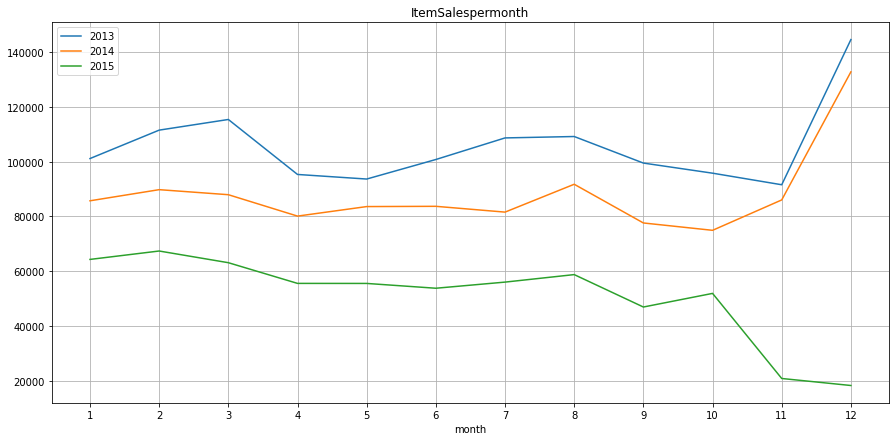

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
plt.xticks([i for i in range(1,13)])
train_df.groupby(train_df[train_df['year']==2013].month).count()['item_id'].plot(ax=ax,label=2013)
train_df.groupby(train_df[train_df['year']==2014].month).count()['item_id'].plot(label=2014)
train_df.groupby(train_df[train_df['year']==2015].month).count()['item_id'].plot(label=2015)
plt.grid("on")
plt.title("ItemSalespermonth")
plt.legend()

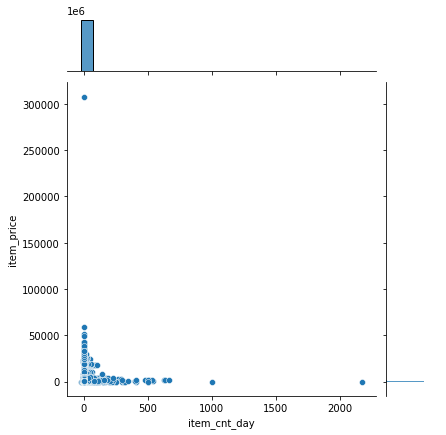

In [ ]:
sns.jointplot(x="item_cnt_day", y="item_price", data=train_df)
plt.show()

In [ ]:
train_df.isnull().sum()

date_block_num        0
shop_id               0
item_id               0
item_price            0
item_cnt_day          0
item_name             0
item_category_id      0
item_category_name    0
shop_name             0
year                  0
month                 0
day                   0
dtype: int64

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date_block_num      int64  
 1   shop_id             int64  
 2   item_id             int64  
 3   item_price          float64
 4   item_cnt_day        float64
 5   item_name           object 
 6   item_category_id    int64  
 7   item_category_name  object 
 8   shop_name           object 
 9   year                int64  
 10  month               int64  
 11  day                 int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 291.2+ MB


In [ ]:
train_df.shape

(2935849, 12)

In [ ]:
train_df.drop_duplicates()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name,year,month,day
0,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",2013,2,1
1,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум""",2013,3,1
2,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум""",2013,5,1
3,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,"Москва ТРК ""Атриум""",2013,6,1
4,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум""",2013,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...
2935844,33,25,7409,299.00,1.0,V/A Nu Jazz Selection (digipack),55,Музыка - CD локального производства,"Москва ТРК ""Атриум""",2015,10,10
2935845,33,25,7460,299.00,1.0,V/A The Golden Jazz Collection 1 2CD,55,Музыка - CD локального производства,"Москва ТРК ""Атриум""",2015,9,10
2935846,33,25,7459,349.00,1.0,V/A The Best Of The 3 Tenors,55,Музыка - CD локального производства,"Москва ТРК ""Атриум""",2015,10,14
2935847,33,25,7440,299.00,1.0,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,Музыка - MP3,"Москва ТРК ""Атриум""",2015,10,22


In [ ]:
train_df.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day',
       'item_name', 'item_category_id', 'item_category_name', 'shop_name',
       'year', 'month', 'day'],
      dtype='object')

In [ ]:
train_df.drop(train_df[train_df.item_price > 3 * train_df.item_price.std()].index, inplace = True)
train_df.drop(train_df[train_df.item_cnt_day > 3 * train_df.item_cnt_day.std()].index, inplace = True)
train_df.drop(train_df[train_df.item_price < 0].index, inplace = True)
train_df.drop(train_df[train_df.item_cnt_day < 0].index, inplace = True)

In [ ]:
train_df['revenue'] = train_df.item_price * train_df.item_cnt_day

In [ ]:
df=train_df.pivot_table(index=['shop_id', 'item_id'], columns='date_block_num', values='item_cnt_day', aggfunc='sum').fillna(0.0)
df.head()

date_block_num    0     1    2    3    4    5    6    7    8    9   ...   24  \
shop_id item_id                                                     ...        
0       30       0.0  22.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        31       0.0  11.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        32       6.0  10.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        33       3.0   3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        35       1.0  14.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   

date_block_num    25   26   27   28   29   30   31   32   33  
shop_id item_id                                               
0       30       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        31       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        32       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        33       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        35       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 34 columns]

In [ ]:
train_df = df.reset_index()
train_df["shop_id"] = train_df.shop_id.astype("str")
train_df["item_id"] = train_df.item_id.astype("str")
train_df.head()

date_block_num,shop_id,item_id,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,32,33
0,0,30,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,31,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,32,6.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,33,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,35,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
item_cat_df = items.merge(item_categories[['item_category_id','item_category_name']], how="inner", on="item_category_id")[['item_id','item_category_name']]

In [ ]:
item_cat_df['item_id'] = item_cat_df.item_id.astype('str')

In [ ]:
train_df = train_df.merge(item_cat_df, how="inner", on="item_id")

In [ ]:
train_df.dropna(axis=1,inplace=True)

In [ ]:
EN = preprocessing.LabelEncoder()
train_df['item_category_name'] = EN.fit_transform(train_df['item_category_name'])
train_df.head()

,shop_id,item_id,0,1,2,3,4,5,6,7,...,25,26,27,28,29,30,31,32,33,item_category_name
0,0,30,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40
1,1,30,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40
2,2,30,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40
3,3,30,0.0,4.0,5.0,2.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,40
4,4,30,0.0,7.0,3.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40


In [ ]:
train_df['item_category_name'] = EN.fit_transform(train_df['item_category_name'])
train_df = train_df[['shop_id', 'item_id', 'item_category_name'] + list(range(34))]
train_df.head()

,shop_id,item_id,item_category_name,0,1,2,3,4,5,6,...,24,25,26,27,28,29,30,31,32,33
0,0,30,40,0.0,22.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,30,40,0.0,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,30,40,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,30,40,0.0,4.0,5.0,2.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,30,40,0.0,7.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
param = {'max_depth': 15, 
         'subsample': 1,
         'min_child_weight': 1,
         'eta':0.34, 
         'seed':1,
         'verbosity': 1,
         'eval_metric':'rmse'}



xgbtrain = xgb.DMatrix(train_df.iloc[:,  (train_df.columns != 33)].values,
                       train_df.iloc[:, train_df.columns == 33].values)

model = xgb.train(param, xgbtrain)
preds = model.predict(xgb.DMatrix(train_df.iloc[:,  (train_df.columns != 33)].values))
RMSE = np.sqrt(mean_squared_error(preds,train_df.iloc[:, train_df.columns == 33].values))

print(RMSE)

0.41412224329402575


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

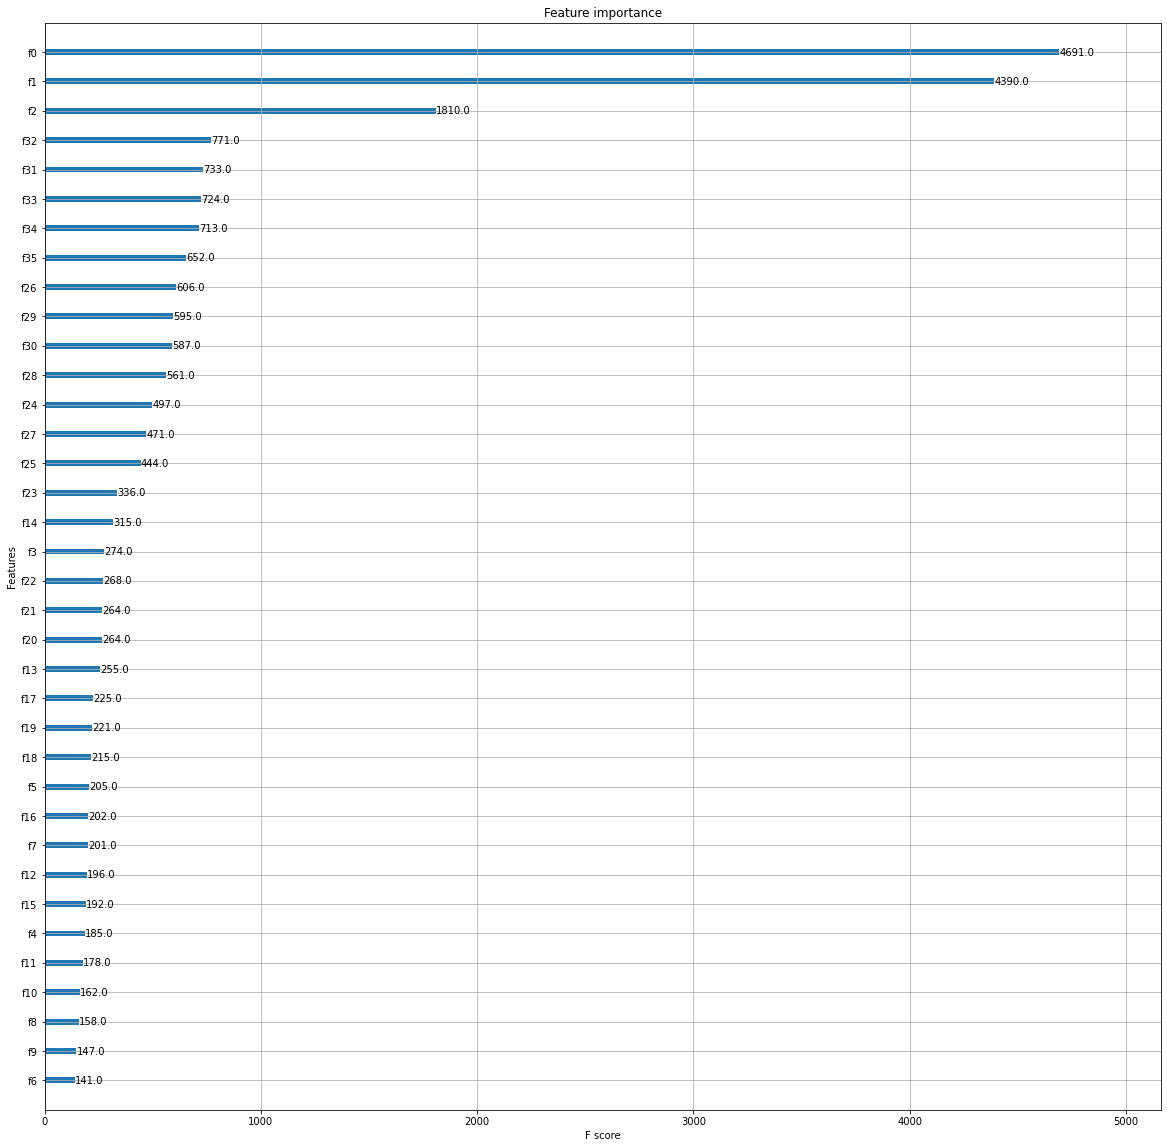

In [ ]:
fig, ax = plt.subplots(figsize = (20, 20))
xgb.plot_importance(model, ax = ax)

In [ ]:
test.shop_id = test.shop_id.astype('str')
test.item_id = test.item_id.astype('str')

In [ ]:
test = test.merge(train_df, how="left", on=["shop_id", "item_id"]).fillna(0.0)
test.head()

,ID,shop_id,item_id,item_category_name,0,1,2,3,4,5,...,24,25,26,27,28,29,30,31,32,33
0,0,5,5037,19.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,19.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,23.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
d = dict(zip(test.columns[4:],list(np.array(list(test.columns[4:])) - 1)))

test = test.rename(d, axis = 1)

In [ ]:
predictions = model.predict(xgb.DMatrix(test.iloc[:, (test.columns != 'ID') & (test.columns != -1)].values))

In [ ]:
predictions = list(map(lambda x: min(20, max(x,0)), list(predictions)))
submission = pd.DataFrame({'ID': test.ID, 'item_cnt_month': predictions})
submission.to_csv('submission.csv', index=False)